# Artificial neural network for churn modelling with 2 hidden layers.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Data Preprocessing

### Importing the dataset

In [40]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [41]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding categorical data

Label Encoding the "Gender" column

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

One Hot Encoding the "Geography" column

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [45]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the ANN

### Initializing the ANN

In [22]:
ann = tf.keras.models.Sequential()

Adding the input layer and the first hidden layer

In [23]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))


Adding the second hidden layer

In [24]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Adding the output layer

In [25]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training the ANN

In [26]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3305 - acc: 0.8629
Epoch 2/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3305 - acc: 0.8618
Epoch 3/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3300 - acc: 0.8622
Epoch 4/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3302 - acc: 0.8645
Epoch 5/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3304 - acc: 0.8640
Epoch 6/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3303 - acc: 0.8626
Epoch 7/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3305 - acc: 0.8631
Epoch 8/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3300 - acc: 0.8640
Epoch 9/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3302 - acc: 0.8625
Epoch 10/100
8000/8000 [==============================] - 0s 19us/sam

Epoch 81/100
8000/8000 [==============================] - 0s 28us/sample - loss: 0.3286 - acc: 0.8637
Epoch 82/100
8000/8000 [==============================] - 0s 42us/sample - loss: 0.3285 - acc: 0.8651
Epoch 83/100
8000/8000 [==============================] - 0s 21us/sample - loss: 0.3285 - acc: 0.8637
Epoch 84/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3284 - acc: 0.8630
Epoch 85/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3286 - acc: 0.8635
Epoch 86/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3284 - acc: 0.8627
Epoch 87/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0.3286 - acc: 0.8624
Epoch 88/100
8000/8000 [==============================] - 0s 20us/sample - loss: 0.3283 - acc: 0.8645
Epoch 89/100
8000/8000 [==============================] - 0s 22us/sample - loss: 0.3285 - acc: 0.8644
Epoch 90/100
8000/8000 [==============================] - 0s 19us/sample - loss: 0

In [33]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [37]:
dataset.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [30]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


In [47]:
ann.predict_classes(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))

array([[0]])

## Making the Confusion Matrix

In [49]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
pred = accuracy_score(y_test, y_pred)

[[1512   83]
 [ 196  209]]


In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1512   83]
 [ 196  209]]


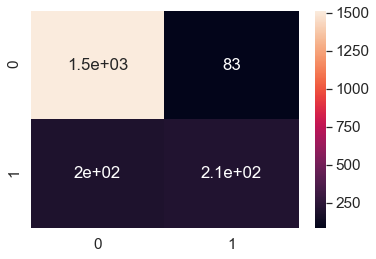

In [61]:
sns.heatmap(cf_matrix, annot=True)